## 1]Import Libraries and Loading Dataset

In [3]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [4]:
pip install nlp

Note: you may need to restart the kernel to use updated packages.


In [5]:
import nlp

In [6]:
tweets_df=pd.read_csv('twitter.csv')

## 2]Overview of Dataset

In [7]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [8]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


### Summary of Dataset

In [9]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [10]:
#No missing data in any of the coloumns

### Statisical Summary of Dataset

In [11]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [12]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

### Dropping 'id' and 'label' coloumns completely

In [13]:
tweets_df=tweets_df.drop(['id','label'],axis=1)

In [14]:
#"id" and "label" coloumn are dropped 
tweets_df

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation
...,...
31957,ate @user isz that youuu?ðððððð...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,..."


## 3]Perform Data Exploration

In [15]:
#Calculating length of all tweets in tweet coloumn
tweets_df['length']=tweets_df['tweet'].apply(len)

In [16]:
tweets_df# TASK#8]CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

,tweet,length
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,86
4,factsguide: society now #motivation,39
...,...,...
31957,ate @user isz that youuu?ðððððð...,68
31958,to see nina turner on the airwaves trying to...,131
31959,listening to sad songs on a monday morning otw...,63
31960,"@user #sikh #temple vandalised in in #calgary,...",67


In [17]:
### New Statistical Summary after length of tweets added
tweets_df.describe()

,length
count,31962.000000
mean,84.739628
std,29.455749
min,11.000000
25%,63.000000
50%,88.000000
75%,108.000000
max,274.000000


In [18]:
#smallest tweets are of length 11.00
#largest tweets are of length 274.00

In [19]:
#displaying the smallest length tweet
tweets_df[tweets_df['length']==11]['tweet']

25195    i love you 
Name: tweet, dtype: object

<AxesSubplot:>

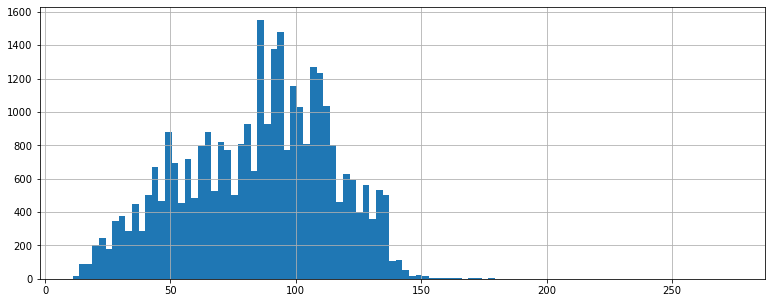

In [20]:
tweets_df['length'].hist(bins=100,figsize=(13,5))

## 4]Create a pipeline to remove punctuations and stopwords

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
#importing nltk(Natural Language Tool Kit)
import nltk
#Downloading stopwords package
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')
 

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
# We created a function 'message_cleaning'(can be named anything as its our own created function)
# We created function 'message cleaning' to perform removal of both punctuation and stopwords
# We passed 'message' as a example object on which our requirements run.
#If we call the function after creation on another dataframe or object it will do all the requirements and applications on that too. 
def message_cleaning(message):
    #Removing Punctuations 
    punc_remove = [char for char in message if char not in string.punctuation]
    #Joining the characters in to a single string after the removal of punctuation 
    punc_remove_join = ''.join(punc_remove)
    #Removing Stopwords
    PuncStop_remove = [word for word in punc_remove_join.split() if word.lower() not in stopwords.words('english')]
    #Returning the final data after removal of both Stoopwords and Punctuations 
    PuncStop_remove_join = ' '.join(PuncStop_remove)
    return PuncStop_remove_join

In [ ]:
# Let's test the newly created function 'message_cleaning' by applying it on 'tweet' coloumn of tweets_df datframe
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [25]:
#Displaying the original version
print(tweets_df['tweet'][5]) 

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [26]:
#Displaying the cleaned up version without Stopwords and Punctuations
print(tweets_df_clean[5])

22 huge fan fare big talking leave chaos pay disputes get allshowandnogo


In [27]:
tweets_df_clean

0        user father dysfunctional selfish drags kids d...
1        user user thanks lyft credit cant use cause do...
2                                           bihday majesty
3        model love u take u time urð± ðððð...
4                            factsguide society motivation
                               ...                        
31957    ate user isz youuuððððððð...
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960    user sikh temple vandalised calgary wso condem...
31961                                    thank user follow
Name: tweet, Length: 31962, dtype: object

## 5]Preparing Train,Test and Validation datasets

In [28]:
#Creating list of all the preprocessed tweets
list_of_tweets=tweets_df_clean.tolist()

In [29]:
list_of_tweets

['user father dysfunctional selfish drags kids dysfunction run',
 'user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked',
 'bihday majesty',
 'model love u take u time urð\x9f\x93± ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦',
 'factsguide society motivation',
 '22 huge fan fare big talking leave chaos pay disputes get allshowandnogo',
 'user camping tomorrow user user user user user user user dannyâ\x80¦',
 'next school year year examsð\x9f\x98¯ cant think ð\x9f\x98\xad school exams hate imagine actorslife revolutionschool girl',
 'love land allin cavs champions cleveland clevelandcavaliers â\x80¦',
 'user user welcome im gr8',
 'â\x86\x9d ireland consumer price index mom climbed previous 02 05 may blog silver gold forex',
 'selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love',
 'get see daddy today 80days gettingfed',
 'user cnn calls michigan mid

In [30]:
text=" ".join(list_of_tweets)

In [31]:
#Displaying the joined string 'text'
text

'user father dysfunctional selfish drags kids dysfunction run user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked bihday majesty model love u take u time urð\x9f\x93± ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦ factsguide society motivation 22 huge fan fare big talking leave chaos pay disputes get allshowandnogo user camping tomorrow user user user user user user user dannyâ\x80¦ next school year year examsð\x9f\x98¯ cant think ð\x9f\x98\xad school exams hate imagine actorslife revolutionschool girl love land allin cavs champions cleveland clevelandcavaliers â\x80¦ user user welcome im gr8 â\x86\x9d ireland consumer price index mom climbed previous 02 05 may blog silver gold forex selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love get see daddy today 80days gettingfed user cnn calls michigan middle school build wall chant tcot comment australia op

In [32]:
# calculate the vocabulary (number of unique characters in text)
vocab = sorted(set(text))
print('{} unique characters'.format(len(vocab)))

131 unique characters


In [33]:
# mapping from unique characters to indices
char_to_index = {u: i for i, u in enumerate(vocab)}
index_to_char = np.array(vocab)

In [34]:
# numerical representation of text
text_as_int = np.array([char_to_index[c] for c in text])

In [35]:
# define the sequence length, which will determine how many example pairs per epoch
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

In [36]:
def split_input_target(chunk):
    #Split a chunk of length n+1 into a tuple containing the the input (first n chars) and the target (last n chars)
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [37]:
# create the dataset
BATCH_SIZE = 64
BUFFER_SIZE = 10000
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)
dataset = sequences.map(split_input_target)
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)


In [38]:
# Split dataset into training, validation, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

In [39]:
vocab_size = len(vocab)
embedding_dim = 64
rnn_units = 512


## 6]Build RNN Model

In [40]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    #Define the model: character embedding -> GRU -> fully connected
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                  batch_input_shape=[batch_size, None]),
        tf.keras.layers.GRU(rnn_units,
                            return_sequences=True,
                            stateful=True,
                            recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

In [41]:
import os

In [42]:
model = build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)

#### Model Summary

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (64, None, 64)            8384      
                                                                 
 gru_1 (GRU)                 (64, None, 512)           887808    
                                                                 
 dense_1 (Dense)             (64, None, 131)           67203     
                                                                 
Total params: 963,395
Trainable params: 963,395
Non-trainable params: 0
_________________________________________________________________


## 7]Model Compilation

In [44]:
def loss(labels, logits):
        return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)
        
# Define validation loss function
val_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [45]:
# Compile the model with validation loss
model.compile(optimizer='adam', loss=loss, metrics=['accuracy', val_loss])

In [46]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#save the best model with lower validation loss in the weights.hdf5 file
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [47]:
#using early stopping to exit training if validation loss is not decreasing even after 7 consecutive epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

## 8]Model Training

In [58]:
history = model.fit(train_dataset, 
                    epochs=24, 
                    validation_data= val_dataset,
                    callbacks=[checkpointer , earlystopping])

Epoch 1/24
213/213 [==============================] - ETA: 0s - loss: 1.7328 - accuracy: 0.5004 - sparse_categorical_crossentropy: 1.7328
Epoch 1: val_loss improved from 1.88810 to 1.68304, saving model to weights.hdf5
213/213 [==============================] - 202s 938ms/step - loss: 1.7328 - accuracy: 0.5004 - sparse_categorical_crossentropy: 1.7328 - val_loss: 1.6830 - val_accuracy: 0.5121 - val_sparse_categorical_crossentropy: 1.6830
Epoch 2/24
213/213 [==============================] - ETA: 0s - loss: 1.6605 - accuracy: 0.5190 - sparse_categorical_crossentropy: 1.6605
Epoch 2: val_loss improved from 1.68304 to 1.62685, saving model to weights.hdf5
213/213 [==============================] - 193s 902ms/step - loss: 1.6605 - accuracy: 0.5190 - sparse_categorical_crossentropy: 1.6605 - val_loss: 1.6268 - val_accuracy: 0.5275 - val_sparse_categorical_crossentropy: 1.6268
Epoch 3/24
213/213 [==============================] - ETA: 0s - loss: 1.6116 - accuracy: 0.5319 - sparse_categorical

In [47]:
# Load the weights from the previously trained model
model.load_weights("weights.hdf5")

# Train the model for an additional 25 epochs
history = model.fit(train_dataset,
                    epochs=49, # 24 + 25 additional epochs
                    initial_epoch=24, # Start training from the 25th epoch
                    validation_data=val_dataset,
                    callbacks=[checkpointer, earlystopping])


Epoch 25/49
213/213 [==============================] - ETA: 0s - loss: 1.2912 - accuracy: 0.6193 - sparse_categorical_crossentropy: 1.2912
Epoch 25: val_loss improved from inf to 1.28725, saving model to weights.hdf5
213/213 [==============================] - 215s 987ms/step - loss: 1.2912 - accuracy: 0.6193 - sparse_categorical_crossentropy: 1.2912 - val_loss: 1.2873 - val_accuracy: 0.6202 - val_sparse_categorical_crossentropy: 1.2873
Epoch 26/49
213/213 [==============================] - ETA: 0s - loss: 1.2858 - accuracy: 0.6213 - sparse_categorical_crossentropy: 1.2858
Epoch 26: val_loss improved from 1.28725 to 1.28178, saving model to weights.hdf5
213/213 [==============================] - 201s 936ms/step - loss: 1.2858 - accuracy: 0.6213 - sparse_categorical_crossentropy: 1.2858 - val_loss: 1.2818 - val_accuracy: 0.6227 - val_sparse_categorical_crossentropy: 1.2818
Epoch 27/49
213/213 [==============================] - ETA: 0s - loss: 1.2780 - accuracy: 0.6235 - sparse_categorica

## 9]Generate New Tweets

In [80]:
def generate_text(model, start_string):
    #Generate text, given a trained model and a starting string
    num_generate = 280
    input_eval = [char_to_index[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(index_to_char[predicted_id])
    
    return start_string + ''.join(text_generated)

In [83]:
generate = True
if generate:
    # Load the best weights back from a checkpoint
    model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
    model.load_weights("weights.hdf5")
    model.build(tf.TensorShape([1, None]))
    print(generate_text(model, start_string="read"))

ready kindle adains user feel putinscatedachie provonality every lebvo normal later afternoon 20th blog fil best friend bike outroot relationship pain aria ne roots let could tear lt global ellahsoi mybacket also growinlou july really take angry episs good time new locs lyin hotophea


## 10]Model Evaluation

In [69]:
# Evaluate the model on the test set
test_loss, test_acc, test_val_loss = model.evaluate(test_dataset)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test validation loss:', test_val_loss)

47/47 [==============================] - 15s 247ms/step - loss: 1.2888 - accuracy: 0.6210 - sparse_categorical_crossentropy: 1.2888
Test loss: 1.2887605428695679
Test accuracy: 0.6209540963172913
Test validation loss: 1.2887605428695679
